**Trabalho de Complementos de Estatística para Ciência de Dados**

**Análise exploratória e experimentação de diferentes métodos de tratamento dos dados omissos**

MADSAD – 2.º Trimestre de 2022/2023

---
Bingnan Zheng       
Carolina Freire     
Raquel Miranda

## Tratamento de dados omissos

In [ ]:
import pandas as pd
import numpy as np

# importar os dados do dataset1
housedata = pd.read_csv("dataset1.csv")

housedata

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,6865200140,485000.0,4,1.00,1600,4300,7.0,1600,NaN,1916,0,98103.0
1,9478500640,292500.0,4,2.50,2250,4495,NaN,2250,NaN,2008,0,98042.0
2,2799800710,301000.0,3,2.50,2420,4750,NaN,2420,NaN,2003,0,98042.0
3,1274500060,204000.0,3,1.00,1000,12070,7.0,1000,NaN,1968,0,98042.0
4,3444100400,349000.0,3,1.75,1790,50529,7.0,1090,700.0,1965,0,98042.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,3832050760,270000.0,3,2.50,1870,5000,7.0,1870,NaN,2009,0,98042.0
1641,1931300412,475000.0,3,2.25,1190,1200,8.0,1190,NaN,2008,0,98103.0
1642,5087900040,350000.0,4,2.75,2500,5995,NaN,2500,NaN,2008,0,98042.0
1643,1972201967,520000.0,2,2.25,1530,981,NaN,1480,50.0,2006,0,98103.0


In [ ]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1645 non-null   int64  
 1   price          1645 non-null   float64
 2   bedrooms       1645 non-null   int64  
 3   bathrooms      1645 non-null   float64
 4   sqft_living    1645 non-null   int64  
 5   sqft_lot       1645 non-null   int64  
 6   grade          1176 non-null   float64
 7   sqft_above     1645 non-null   int64  
 8   sqft_basement  603 non-null    float64
 9   yr_built       1645 non-null   int64  
 10  yr_renovated   1645 non-null   int64  
 11  zipcode        1572 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 154.3 KB


In [ ]:
housedata.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,1.645000e+03,1645.00,1645.00,1645.00,1645.00,1645.00,1176.00,1645.00,603.00,1645.00,1645.00,1572.00
mean,4.589062e+09,442931.08,3.18,1.95,1774.64,9333.82,7.14,1530.26,666.66,1963.43,92.23,98087.37
std,2.864792e+09,220309.86,0.94,0.75,728.36,24725.98,0.84,632.00,368.28,36.41,419.21,32.54
min,7.400062e+06,105000.00,0.00,0.50,390.00,651.00,4.00,390.00,10.00,1900.00,0.00,98042.00
25%,1.972202e+09,290000.00,3.00,1.00,1240.00,3694.00,7.00,1070.00,400.00,1926.00,0.00,98042.00
50%,3.904100e+09,390000.00,3.00,2.00,1640.00,5105.00,7.00,1380.00,660.00,1968.00,0.00,98103.00
75%,7.129304e+09,549900.00,4.00,2.50,2160.00,7264.00,8.00,1840.00,900.00,2000.00,0.00,98118.00
max,9.830200e+09,2903000.00,9.00,5.00,5820.00,443440.00,11.00,5450.00,2190.00,2015.00,2015.00,98118.00


In [ ]:
# Fazer uma soma para saber quantos dados omissos tem em cada coluna de dados:

miss_v = housedata.isnull().sum()
miss_v

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
grade             469
sqft_above          0
sqft_basement    1042
yr_built            0
yr_renovated        0
zipcode            73
dtype: int64

As colunas que contém dados omissos são: grade, sqft_basement e zipcode.

Para não deixar os dados omissos fugir por terem o valor zero é feita ainda uma verificação dos dados com o valor em zero: 

In [ ]:
zeros = (housedata == 0).sum()
zeros

id                  0
price               0
bedrooms            2
bathrooms           0
sqft_living         0
sqft_lot            0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     1569
zipcode             0
dtype: int64

As únicas duas colunas que apresentam valores zero são *o bedrooms* (número de quartos) e *yr_renovated* (ano de renovação), os dois apresentam dados normais. Por isso não são verificados dados omissos na verificação dos números zero.   

In [ ]:
miss_v_p = (miss_v/1645) * 100

print(miss_v_p.round(2))

id                0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
grade            28.51
sqft_above        0.00
sqft_basement    63.34
yr_built          0.00
yr_renovated      0.00
zipcode           4.44
dtype: float64


A porcentagem dos dados omissos é um fator importamte na decisão do tratamento de dados. Na situação em análise, das três colunas com dados omissos, o *zipcode* apresenta 4,44% de valores omissos, o *grade* 28,51% e o mais grave é o *sqft_basement*, que apresenta 63,34.   

#### Visualização dos dados omissos

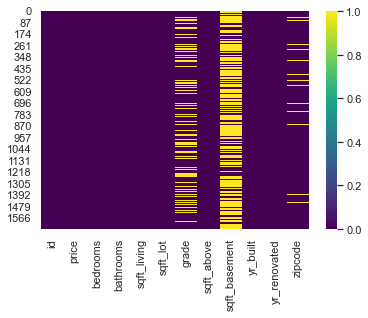

In [ ]:
sns.heatmap(housedata.isnull(), cmap='viridis')
plt.show()

### Após a realização do estudo, conclui-se que existe os seguintes dados omissos:
1. grade: classificação do imóvel (de 1 a 13)
2. sqft_basement: metro quadrado do porão do imóvel
3. zipcode: código residencial do imóvel

###### 1. Grade:

Antes de tratar os dados omissos, é importante fazer uma análise dos dados existentes para estudar o tipo de dados omissos dessa coluna.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

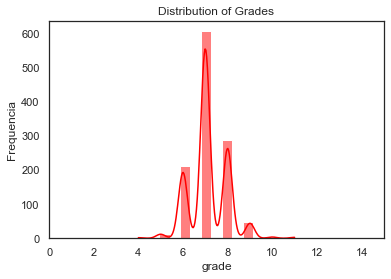

In [ ]:
# Visualização em histograma a distribuição dos valores do 'grade': 
sns.histplot(housedata['grade'], bins=15, kde=True, color='red')
plt.xlim(0,15)
plt.title('Distribution of Grades')
plt.xlabel('grade')
plt.ylabel('Frequencia')
plt.show()

Como a distribuição segue duma forma normal: por 7

Então podemos concluir, em princípio, que os dados omissos de *grade* são dados MAR (omissos aleatoriamente), pois a distribuição começa por um valor de classificação mediana e o valor tem correlação com outros valores da tabela.

A classificação *grade* do imóvel pode ter alta correlação com outro valor apresentado. Assim, escolhemos realizar um cálculo de correlações para verificar a situação da correlação do grade com outros variáveis:

In [ ]:
# Calcular a correlação:
correlacao = housedata.corr()

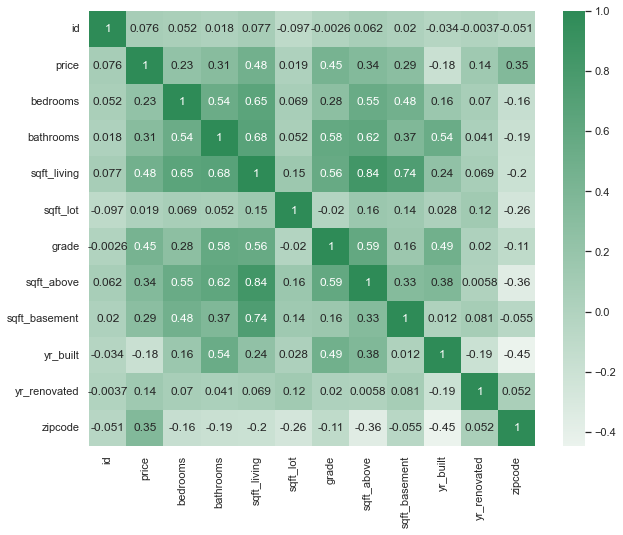

In [ ]:
# Mostrar os valores de correlcão em gráfico:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.show()

Após da análise de correlação, verificamos que o indice grade não tem particularmente correlação alta com um outro indicador, pois a correlação apresentada mais elevada que é de 0,59, com o *sqft_above*.


Regressão linear:
Como as correlaçõs são em geral baixas, isso significa que um único indicador não é suficiente para determinar os dados omissos do *grade*. Deste modo, atendendo a caraterística do conjunto de dados, buscamos uma solução usando a regressão linear:

In [ ]:
from sklearn.linear_model import LinearRegression

# Separar os dados omissos dos que não são omissos 
grade_miss = housedata[housedata['grade'].isna()]
grade_n_miss = housedata[housedata['grade'].notna()]

# Escolher os variaveis que tem maior correlação
variaveis = ['sqft_above', 'bathrooms', 'sqft_living', 'yr_built', 'price']

# Criar o modelo de regressão
grademodel = LinearRegression()

# Treinar o modelo usando os valores não omissos
grademodel.fit(grade_n_miss[variaveis], grade_n_miss['grade'])

# Prever os dados omissos
prev_grade = grademodel.predict(grade_miss[variaveis])

# Mudar os valores para numeros inteiros
prev_grade = np.round(prev_grade).astype(int)

Antes de preencher os as linhas com dados em falta, é importante analisar a sua credibilidade.
Como já tinhamos apresentado a distribuição normal dos dados não omissos, podemos fazer também para os dados previdos pelo modelo:

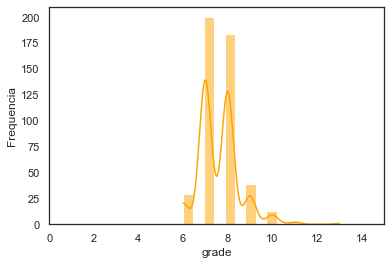

In [ ]:
sns.histplot(prev_grade, bins=15, kde=True, color='orange')
plt.xlim(0,15)
plt.xlabel('grade')
plt.ylabel('Frequencia')
plt.show()

A distribuição dos dados previdos também apresentam a distribuição normal, mas a diferença com os dados não omissos é que os valores são em geral mais inclinados para valores mais elevados. 

In [ ]:
# Vamos preencher os dados determidados do modelo para a tabela
housedata.loc[housedata['grade'].isnull(), 'grade'] = prev_grade

In [ ]:
housedata

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,6865200140,485000.0,4,1.00,1600,4300,7.0,1600,NaN,1916,0,98103.0
1,9478500640,292500.0,4,2.50,2250,4495,8.0,2250,NaN,2008,0,98042.0
2,2799800710,301000.0,3,2.50,2420,4750,8.0,2420,NaN,2003,0,98042.0
3,1274500060,204000.0,3,1.00,1000,12070,7.0,1000,NaN,1968,0,98042.0
4,3444100400,349000.0,3,1.75,1790,50529,7.0,1090,700.0,1965,0,98042.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,3832050760,270000.0,3,2.50,1870,5000,7.0,1870,NaN,2009,0,98042.0
1641,1931300412,475000.0,3,2.25,1190,1200,8.0,1190,NaN,2008,0,98103.0
1642,5087900040,350000.0,4,2.75,2500,5995,8.0,2500,NaN,2008,0,98042.0
1643,1972201967,520000.0,2,2.25,1530,981,8.0,1480,50.0,2006,0,98103.0


Por fim, é feito um teste do R-quadrado para avaliar a credibilidade do modelo:

In [ ]:
from sklearn.metrics import r2_score

# calcular o valor do R-quadrado para tester a viabilidade do modelo:
r2 = r2_score(grade_n_miss['grade'], grademodel.predict(grade_n_miss[variaveis]))

print('R2 score:', r2)

R2 score: 0.6134429081286632


As 5 variáveis que treinaram este modelo conseguem explicar 61,34% da classificação da casa.

##### 2. Sqft_basement: 
Não é dificil de reparar que todos os valores omissos desta lista são os que não tem porão, ou seja, são dados MNAR (omissos não aleatórios).  
Então poderiamos atribuir o valor zero para todas linhas que estão sem dados. 
Mas para não termos erros no conjunto, é mais seguro realizar a alteração através de um cálculo.

Como temos valor total dos metros quadrados da casa (*sqft_living*) e  dos metros quadrados da casa sem o porão (*sqft_above*),  através da subtração do *sqft_living* com  *sqft_above*, alcançalmos o valor do *sqft_basement*.


In [ ]:
# subtração da área da casa com a área da casa sem o porão
basement = housedata['sqft_living'] - housedata['sqft_above']

# prencher os dados em falta da coluna['sqft_basement']
housedata['sqft_basement'].fillna(basement, inplace=True)

housedata

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,6865200140,485000.0,4,1.00,1600,4300,7.0,1600,0.0,1916,0,98103.0
1,9478500640,292500.0,4,2.50,2250,4495,8.0,2250,0.0,2008,0,98042.0
2,2799800710,301000.0,3,2.50,2420,4750,8.0,2420,0.0,2003,0,98042.0
3,1274500060,204000.0,3,1.00,1000,12070,7.0,1000,0.0,1968,0,98042.0
4,3444100400,349000.0,3,1.75,1790,50529,7.0,1090,700.0,1965,0,98042.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,3832050760,270000.0,3,2.50,1870,5000,7.0,1870,0.0,2009,0,98042.0
1641,1931300412,475000.0,3,2.25,1190,1200,8.0,1190,0.0,2008,0,98103.0
1642,5087900040,350000.0,4,2.75,2500,5995,8.0,2500,0.0,2008,0,98042.0
1643,1972201967,520000.0,2,2.25,1530,981,8.0,1480,50.0,2006,0,98103.0


##### 3. Zipcode

O *zipcode*, apesar de ser apresentado em dados numéricos, é  um dado qualitativo. Asssim, não é possivel usar qualquer forma de cálculo para o prever, pois é um tipo de dado MCAR (omissos completamente ao acaso).

Em atenção a pouca quantidade de dados omissos apresentados nesta coluna (4,44%), decidimos eliminar as linhas na quais se verificam os dados do *zipcode* em falta:

In [ ]:
housedata['zipcode'].value_counts()

98103.0    570
98042.0    521
98118.0    481
Name: zipcode, dtype: int64

In [ ]:
housedata.dropna(axis = 0, how='any', inplace=True)
housedata

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,6865200140,485000.0,4,1.00,1600,4300,7.0,1600,0.0,1916,0,98103.0
1,9478500640,292500.0,4,2.50,2250,4495,8.0,2250,0.0,2008,0,98042.0
2,2799800710,301000.0,3,2.50,2420,4750,8.0,2420,0.0,2003,0,98042.0
3,1274500060,204000.0,3,1.00,1000,12070,7.0,1000,0.0,1968,0,98042.0
4,3444100400,349000.0,3,1.75,1790,50529,7.0,1090,700.0,1965,0,98042.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,3832050760,270000.0,3,2.50,1870,5000,7.0,1870,0.0,2009,0,98042.0
1641,1931300412,475000.0,3,2.25,1190,1200,8.0,1190,0.0,2008,0,98103.0
1642,5087900040,350000.0,4,2.75,2500,5995,8.0,2500,0.0,2008,0,98042.0
1643,1972201967,520000.0,2,2.25,1530,981,8.0,1480,50.0,2006,0,98103.0


In [ ]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1644
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1572 non-null   int64  
 1   price          1572 non-null   float64
 2   bedrooms       1572 non-null   int64  
 3   bathrooms      1572 non-null   float64
 4   sqft_living    1572 non-null   int64  
 5   sqft_lot       1572 non-null   int64  
 6   grade          1572 non-null   float64
 7   sqft_above     1572 non-null   int64  
 8   sqft_basement  1572 non-null   float64
 9   yr_built       1572 non-null   int64  
 10  yr_renovated   1572 non-null   int64  
 11  zipcode        1572 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 159.7 KB


In [ ]:
housedata.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

In [ ]:
housedata.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,1.572000e+03,1572.00,1572.00,1572.00,1572.00,1572.00,1572.00,1572.00,1572.00,1572.00,1572.00,1572.00
mean,4.621429e+09,442471.26,3.18,1.95,1774.98,9335.24,7.27,1529.48,245.49,1963.49,90.19,98087.37
std,2.867947e+09,219490.00,0.94,0.75,725.03,25095.72,0.88,628.94,389.73,36.41,414.82,32.54
min,7.400062e+06,105000.00,0.00,0.50,390.00,651.00,4.00,390.00,0.00,1900.00,0.00,98042.00
25%,1.972202e+09,290000.00,3.00,1.00,1240.00,3709.75,7.00,1070.00,0.00,1926.00,0.00,98042.00
50%,3.908050e+09,390000.00,3.00,2.00,1640.00,5125.00,7.00,1380.00,0.00,1968.00,0.00,98103.00
75%,7.131300e+09,550000.00,4.00,2.50,2161.50,7218.25,8.00,1850.00,462.50,2000.00,0.00,98118.00
max,9.830200e+09,2903000.00,9.00,5.00,5820.00,443440.00,13.00,5450.00,2190.00,2015.00,2014.00,98118.00
